In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
voice_usage_info = pd.read_csv("data/VOICE_INCOMING_CALL_USAGE_OFFNET.csv")

voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),ym,rtom_code,location_code,msan,equp_id,equp_index
0,412244863,ef74b1171331411a4d2e9fada9158215,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
1,412244863,ef74b1171331411a4d2e9fada9158215,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
2,662227788,30576ca16275a38f6bb4491015edb96c,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
3,412244863,ef74b1171331411a4d2e9fada9158215,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
4,412228632,d3439750c4842a755ebfddc64a0b42ae,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
...,...,...,...,...,...,...,...,...,...,...
36151,112411111,64879716f309303245754526212d990e,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36152,112411111,64879716f309303245754526212d990e,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36153,112411111,64879716f309303245754526212d990e,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36154,112411111,64879716f309303245754526212d990e,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1


In [3]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating call count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [4]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","ym"], keep="last")

voice_usage_info.shape

(36155, 10)

In [5]:
voice_usage_info = voice_usage_info.drop(['event_source'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','ym':'year-month'}, inplace=True)
voice_usage_info

,event_source.hash,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index
0,ef74b1171331411a4d2e9fada9158215,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
1,ef74b1171331411a4d2e9fada9158215,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
2,30576ca16275a38f6bb4491015edb96c,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
3,ef74b1171331411a4d2e9fada9158215,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
4,d3439750c4842a755ebfddc64a0b42ae,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1
...,...,...,...,...,...,...,...,...,...
36151,64879716f309303245754526212d990e,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36152,64879716f309303245754526212d990e,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36153,64879716f309303245754526212d990e,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1
36154,64879716f309303245754526212d990e,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1


In [6]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0          2
1          3
2         10
3         14
4         65
        ... 
36151    182
36152    173
36153    196
36154    205
36155    242
Name: call_count, Length: 36155, dtype: int64

In [7]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
year-month           0
rtom_code            0
location_code        0
msan                 0
equp_id              0
equp_index           0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call count/Duration
- 3. Usage Rank
- 4. Labling usage

In [8]:
voice_usage = voice_usage_info[['event_source.hash','call_count','duration','year-month']]
voice_usage


,event_source.hash,call_count,duration,year-month
0,ef74b1171331411a4d2e9fada9158215,2,186,202001
1,ef74b1171331411a4d2e9fada9158215,3,114,202002
2,30576ca16275a38f6bb4491015edb96c,10,2435,201909
3,ef74b1171331411a4d2e9fada9158215,14,1061,202003
4,d3439750c4842a755ebfddc64a0b42ae,65,7971,201910
...,...,...,...,...
36151,64879716f309303245754526212d990e,182,20134,202008
36152,64879716f309303245754526212d990e,173,14409,201908
36153,64879716f309303245754526212d990e,196,19571,201910
36154,64879716f309303245754526212d990e,205,17685,201911


In [9]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                              \
year-month                           201908 201909 201910 201911 201912   
event_source.hash                                                         
00221451f705ebe26051158bb14f567a         57     42     49     39     40   
002fb47f60400713c854b0f69ff78c0a         17     10     12      7     13   
00567a4a3c474aca1ce5cd6570648932          2      0      0      0      0   
006be321aad541ff1d6c32a43dd7cdde         49     55     65     47     64   
00724ae2470df1ed0fe919800d02517d          0      0      0      0      0   
...                                     ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2          2      7      0      7      3   
ffb63ff99cf1354dff1da862f379da80         65     77     81     54     62   
ffd697d66cc01c8897ce3e37d693673a         41     28     13      0      0   
ffd96f173d6cd683bf3384bdc2f99713         49     43     31     25     57   
ffee845c0caa320b55e31bb156827d16          4     10      7      6      9   

                                                                     ...  \
year-month                       202001 202002 202003 202004 202005  ...   
event_source.hash                                                    ...   
00221451f705ebe26051158bb14f567a     40     23     26      8     15  ...   
002fb47f60400713c854b0f69ff78c0a     18     37     24      8     17  ...   
00567a4a3c474aca1ce5cd6570648932      2      0      0      0      0  ...   
006be321aad541ff1d6c32a43dd7cdde     33     52    142     46     61  ...   
00724ae2470df1ed0fe919800d02517d      0      0      0      0      0  ...   
...                                 ...    ...    ...    ...    ...  ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      3      2      1      0      0  ...   
ffb63ff99cf1354dff1da862f379da80     69     65     55     19     46  ...   
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0      0  ...   
ffd96f173d6cd683bf3384bdc2f99713     45     32     44     38     21  ...   
ffee845c0caa320b55e31bb156827d16      6     20     19     14     11  ...   

                                 duration                                     \
year-month                         201911 201912 202001 202002 202003 202004   
event_source.hash                                                              
00221451f705ebe26051158bb14f567a      852   1456   2766    773    696   1177   
002fb47f60400713c854b0f69ff78c0a     1237   4155   1819  13071   5740   4327   
00567a4a3c474aca1ce5cd6570648932        0      0     27      0      0      0   
006be321aad541ff1d6c32a43dd7cdde    10839  14273  10759  12371  28960  11989   
00724ae2470df1ed0fe919800d02517d        0      0      0      0      0      0   
...                                   ...    ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      708    254     91    566    876      0   
ffb63ff99cf1354dff1da862f379da80     3161   3102   4837   3965   3876   1510   
ffd697d66cc01c8897ce3e37d693673a        0      0      0      0      0      0   
ffd96f173d6cd683bf3384bdc2f99713     1082   7429   4028   2159   6493   5794   
ffee845c0caa320b55e31bb156827d16      946    208     87    283   3117   2315   

                                                              
year-month                       202005 202006 202007 202008  
event_source.hash                                             
00221451f705ebe26051158bb14f567a   1365   1595   1969   3433  
002fb47f60400713c854b0f69ff78c0a   4760   1014   1020    549  
00567a4a3c474aca1ce5cd6570648932      0      0      0      0  
006be321aad541ff1d6c32a43dd7cdde  11727  14445  15537  12057  
00724ae2470df1ed0fe919800d02517d      0      0      0   4134  
...                                 ...    ...    ...    ...  
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      0     73      0      0  
ffb63ff99cf1354dff1da862f379da80   3202   4699   7283   4371  
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0  
ffd96f173d6cd683bf3384bdc2f99713   2620 

In [10]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]


Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [11]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [12]:
pivot_voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

call_count                                                  \
year-month      201908      201909      201910      201911      201912   
count       3329.00000  3329.00000  3329.00000  3329.00000  3329.00000   
mean          48.44067    47.52598    51.09042    48.65906    51.97236   
std          130.59213   136.98717   145.82699   131.81204   133.12486   
min            0.00000     0.00000     0.00000     0.00000     0.00000   
25%            4.00000     4.00000     5.00000     4.00000     5.00000   
50%           23.00000    24.00000    25.00000    24.00000    26.00000   
75%           57.00000    56.00000    60.00000    58.00000    61.00000   
max         4459.00000  4940.00000  5242.00000  4397.00000  4162.00000   

                                                                        ...  \
year-month      202001      202002      202003      202004      202005  ...   
count       3329.00000  3329.00000  3329.00000  3329.00000  3329.00000  ...   
mean          43.26224    46.80805    43.56083    33.52989    37.42746  ...   
std          125.44991   133.14003   103.47912    86.67630    90.99460  ...   
min            0.00000     0.00000     0.00000     0.00000     0.00000  ...   
25%            4.00000     4.00000     4.00000     1.00000     3.00000  ...   
50%           22.00000    23.00000    21.00000    14.00000    17.00000  ...   
75%           51.00000    54.00000    52.00000    38.00000    44.00000  ...   
max         4728.00000  4506.00000  2723.00000  1873.00000  2708.00000  ...   

                duration                                            \
year-month        201911        201912        202001        202002   
count         3329.00000    3329.00000    3329.00000    3329.00000   
mean          4569.85101    4928.43977    4134.31271    4492.68459   
std          11611.79742   12256.55303   12454.25400   12686.83414   
min              0.00000       0.00000       0.00000       0.00000   
25%            206.00000     264.00000     196.00000     226.00000   
50%           1829.00000    2057.00000    1726.00000    1807.00000   
75%           5435.00000    5787.00000    4823.00000    5105.00000   
max         446444.00000  470223.00000  569355.00000  551829.00000   

                                                                    \
year-month        202003        202004        202005        202006   
count         3329.00000    3329.00000    3329.00000    3329.00000   
mean          4812.55392    4459.83959    4389.07360    4578.25894   
std           9513.73281    8616.81687    8528.61850   10396.66495   
min              0.00000       0.00000       0.00000       0.00000   
25%            240.00000      33.00000     104.00000     187.00000   
50%           1935.00000    1466.00000    1617.00000    1767.00000   
75%           5649.00000    5222.00000    5127.00000    5211.00000   
max         245227.00000  121949.00000  154820.00000  303276.00000   

                                        
year-month        202007        202008  
count         3329.00000    3329.00000  
mean          4975.77531    4968.77321  
std          13038.52050   15332.83668  
min              0.00000       0.00000  
25%            204.00000     217.00000  
50%           1972.00000    1901.00000  
75%           5479.00000    5712.00000  
max         524405.00000  709004.00000  

[8 rows x 26 columns]

In [13]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,36155.00000,36155.00000,36155.00000
mean,54.83114,5550.92640,201968.02605
std,134.93231,12798.90755,46.04757
min,1.00000,1.00000,201908.00000
25%,11.00000,823.00000,201911.00000
50%,30.00000,2667.00000,202002.00000
75%,62.00000,6400.00000,202005.00000
max,5558.00000,709004.00000,202008.00000


In [15]:
# Freedman-Diaconis’s Rule for binnig
hist_values = np.histogram_bin_edges(voice_usage["call_count"].values,bins="fd")
hist_values

array([1.00000000e+00, 4.08379578e+00, 7.16759156e+00, ...,
       5.55183241e+03, 5.55491620e+03, 5.55800000e+03])

In [14]:
# binning call_count
count_bins = [0, 11, 30, 100,300,800,2000,3500, 5558]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-14-2060bf1af780>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,3,3,3,3,3,3,2,2,1,2,3,2,3
002fb47f60400713c854b0f69ff78c0a,2,1,2,1,2,2,3,2,1,2,1,2,1
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,0,1,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,3,3,3,3,3,3,3,4,3,3,3,3,3
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,1,1,0,1,1,1,1,1,0,0,1,0,0
ffb63ff99cf1354dff1da862f379da80,3,3,3,3,3,3,3,3,2,3,3,3,3
ffd697d66cc01c8897ce3e37d693673a,3,2,2,0,0,0,0,0,0,0,0,0,0


In [15]:
# binning duration
duration_bins = [0, 840, 2640, 6420,12880,25720,60000,240000,709004]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-15-eb75694b315c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,2,2,2,2,2,3,1,1,2,2,2,2,3
002fb47f60400713c854b0f69ff78c0a,2,3,3,2,3,2,5,3,3,3,2,2,1
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,0,1,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,3,4,4,4,5,4,4,6,4,4,5,5,4
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,1,1,0,1,1,1,1,2,0,0,1,0,0
ffb63ff99cf1354dff1da862f379da80,3,3,3,3,3,3,3,3,2,3,3,4,3
ffd697d66cc01c8897ce3e37d693673a,2,1,1,0,0,0,0,0,0,0,0,0,0


In [16]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [17]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

## ToDO
- find a different approach other than product

### Justification
- 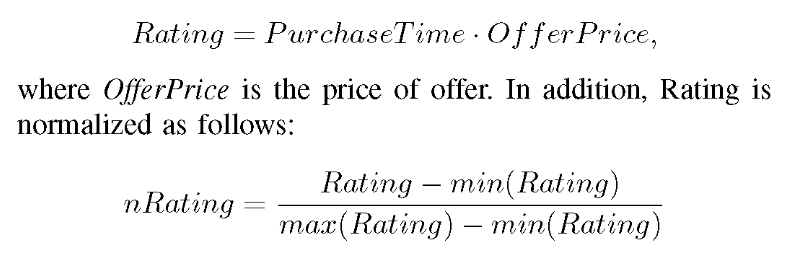https://doi.org/10.1109/ICCE48956.2021.9352111, 2021  (Pham, C. D., Anh Chu, T., Pham, H. H., Linh Dao, M., Pham, T. S., Hung Trinh, V., & Nguyen, D. H. A recommendation system for offers in telecommunications)
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [18]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,6,6,6,6,6,9,2,2,2,4,6,4,9
002fb47f60400713c854b0f69ff78c0a,4,3,6,2,6,4,15,6,3,6,2,4,1
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,0,1,0,0,0,0,0,0,0
006be321aad541ff1d6c32a43dd7cdde,9,12,12,12,15,12,12,24,12,12,15,15,12
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,1,1,0,1,1,1,1,2,0,0,1,0,0
ffb63ff99cf1354dff1da862f379da80,9,9,9,9,9,9,9,9,4,9,9,12,9


In [19]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [20]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

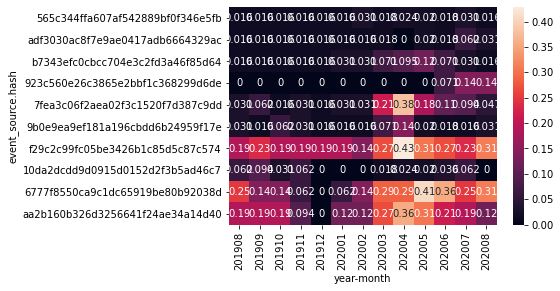

In [21]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [22]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.093750,0.093750,0.093750,0.093750,0.093750,0.140625,0.031250,0.035714,0.047619,0.081633,0.107143,0.062500,0.140625,0.085835
002fb47f60400713c854b0f69ff78c0a,0.062500,0.046875,0.093750,0.031250,0.093750,0.062500,0.234375,0.107143,0.071429,0.122449,0.035714,0.062500,0.015625,0.079989
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002404
006be321aad541ff1d6c32a43dd7cdde,0.140625,0.187500,0.187500,0.187500,0.234375,0.187500,0.187500,0.428571,0.285714,0.244898,0.267857,0.234375,0.187500,0.227801
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140625,0.010817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.015625,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.011332
ffb63ff99cf1354dff1da862f379da80,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.160714,0.095238,0.183673,0.160714,0.187500,0.140625,0.147142
ffd697d66cc01c8897ce3e37d693673a,0.093750,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012019


### Finding Outliers

<AxesSubplot:>

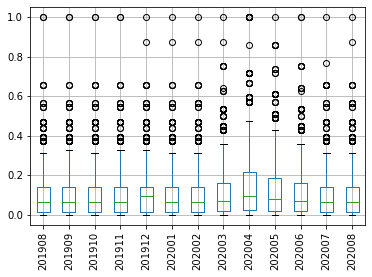

In [23]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:ylabel='year-month'>

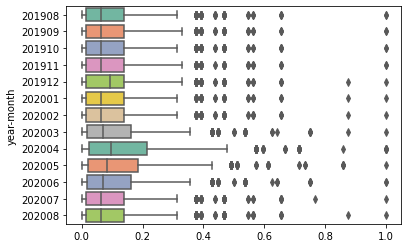

In [24]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

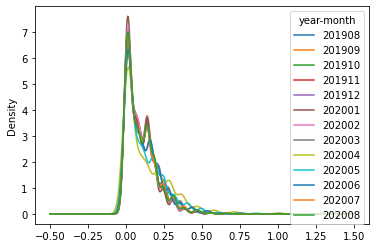

In [25]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [26]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [27]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 201908---->
 [1.0, 0.65625, 0.546875, 0.65625, 0.546875, 0.5625, 0.5625, 0.546875, 0.65625, 1.0, 0.65625, 0.5625]
12

Possible Outliers for 201908----->
 [1.0, 0.375, 0.375, 0.375, 0.375, 0.390625, 0.4375, 0.46875, 0.4375, 0.375, 0.375, 0.390625, 0.390625, 0.46875, 0.65625, 0.546875, 0.375, 0.375, 0.46875, 0.390625, 0.46875, 0.46875, 0.65625, 0.390625, 0.375, 0.375, 0.375, 0.375, 0.390625, 0.390625, 0.46875, 0.546875, 0.46875, 0.390625, 0.375, 0.4375, 0.46875, 0.46875, 0.4375, 0.5625, 0.375, 0.375, 0.46875, 0.46875, 0.375, 0.375, 0.5625, 0.46875, 0.546875, 0.375, 0.46875, 0.375, 0.375, 0.375, 0.390625, 0.390625, 0.390625, 0.375, 0.46875, 0.375, 0.46875, 0.390625, 0.65625, 0.390625, 0.375, 0.390625, 0.375, 0.46875, 0.390625, 0.375, 0.4375, 0.390625, 0.375, 0.390625, 0.375, 1.0, 0.46875, 0.65625, 0.46875, 0.5625, 0.390625, 0.375, 0.4375, 0.390625]
84


Probable Outliers for 201909---->
 [1.0, 0.546875, 0.65625, 0.546875, 0.65625, 0.546875, 0.5625, 0.5625, 0.5625, 0

In [28]:
pr_col_threshold

[{201908: {'threshold': 0.546875, 'count': 12}},
 {201909: {'threshold': 0.546875, 'count': 13}},
 {201910: {'threshold': 0.546875, 'count': 13}},
 {201911: {'threshold': 0.546875, 'count': 15}},
 {201912: {'threshold': 0.546875, 'count': 15}},
 {202001: {'threshold': 0.546875, 'count': 11}},
 {202002: {'threshold': 0.546875, 'count': 13}},
 {202003: {'threshold': 0.625, 'count': 11}},
 {202004: {'threshold': 0.8571428571428571, 'count': 8}},
 {202005: {'threshold': 0.7142857142857142, 'count': 11}},
 {202006: {'threshold': 0.625, 'count': 12}},
 {202007: {'threshold': 0.546875, 'count': 15}},
 {202008: {'threshold': 0.546875, 'count': 15}}]

In [29]:
po_col_threshold

[{201908: {'threshold': 0.375, 'count': 84}},
 {201909: {'threshold': 0.328125, 'count': 79}},
 {201910: {'threshold': 0.375, 'count': 87}},
 {201911: {'threshold': 0.328125, 'count': 73}},
 {201912: {'threshold': 0.328125, 'count': 93}},
 {202001: {'threshold': 0.375, 'count': 59}},
 {202002: {'threshold': 0.375, 'count': 74}},
 {202003: {'threshold': 0.42857142857142855, 'count': 84}},
 {202004: {'threshold': 0.5714285714285714, 'count': 68}},
 {202005: {'threshold': 0.42857142857142855, 'count': 74}},
 {202006: {'threshold': 0.42857142857142855, 'count': 88}},
 {202007: {'threshold': 0.375, 'count': 99}},
 {202008: {'threshold': 0.375, 'count': 87}}]

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
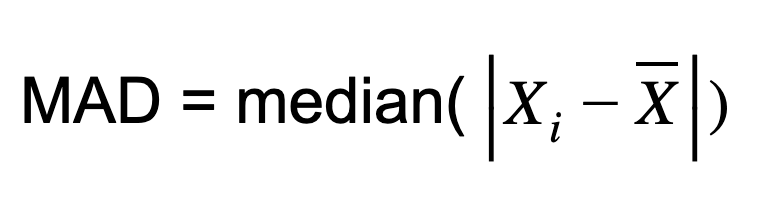

In [30]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [31]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))


Outliers for 201908---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    1.000000
068b2396c4322ce07b969d691d7f4a17    0.375000
06b93cc32b6bfdbc24ab9c6df1da3d0b    0.375000
0899e33770abeaa2d8656e959c3ce500    0.375000
0cff0b18c28ab6c37c132155b1b40dc2    0.375000
                                      ...   
e71a4c4fc624972a897879f056ef9991    0.562500
ebd27202064983929d81256450c31b9e    0.390625
ee78f9b1b26a91e597ac88b2deb50c12    0.375000
eed7f3f30674586c49a71e0a84f28ce9    0.437500
f4c08bc90da90c3ca76c68b88b14cdfb    0.390625
Name: 201908, Length: 84, dtype: float64
84

Outliers for 201909---->
 event_source.hash
009f305bf85a71012c0e343233e611ba    1.000000
068b2396c4322ce07b969d691d7f4a17    0.375000
06b93cc32b6bfdbc24ab9c6df1da3d0b    0.375000
0cff0b18c28ab6c37c132155b1b40dc2    0.375000
124890dad6bc1a3d2297079fe56cc9bf    0.375000
                                      ...   
e62d17dab22425b9abc747759fb38dbd    0.468750
e71a4c4fc624972a897879f056ef9991    0.562500
ebd27202064

<ipython-input-30-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))


In [32]:
col_threshold

[{201908: {'threshold': 0.375, 'count': 84}},
 {201909: {'threshold': 0.375, 'count': 78}},
 {201910: {'threshold': 0.375, 'count': 87}},
 {201911: {'threshold': 0.375, 'count': 72}},
 {201912: {'threshold': 0.375, 'count': 92}},
 {202001: {'threshold': 0.375, 'count': 59}},
 {202002: {'threshold': 0.375, 'count': 74}},
 {202003: {'threshold': 0.3571428571428571, 'count': 172}},
 {202004: {'threshold': 0.3571428571428571, 'count': 345}},
 {202005: {'threshold': 0.36734693877551017, 'count': 179}},
 {202006: {'threshold': 0.3571428571428571, 'count': 165}},
 {202007: {'threshold': 0.375, 'count': 99}},
 {202008: {'threshold': 0.375, 'count': 87}}]

In [33]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.3702904238618524


In [34]:
# labling usage bins
bins = [0, 0.1, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.093750,0.093750,0.093750,0.093750,0.093750,0.140625,0.031250,0.035714,0.047619,0.081633,0.107143,0.062500,0.140625,0.085835,NO,LOW
002fb47f60400713c854b0f69ff78c0a,0.062500,0.046875,0.093750,0.031250,0.093750,0.062500,0.234375,0.107143,0.071429,0.122449,0.035714,0.062500,0.015625,0.079989,NO,LOW
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002404,NO,LOW
006be321aad541ff1d6c32a43dd7cdde,0.140625,0.187500,0.187500,0.187500,0.234375,0.187500,0.187500,0.428571,0.285714,0.244898,0.267857,0.234375,0.187500,0.227801,NO,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140625,0.010817,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.015625,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.011332,NO,LOW
ffb63ff99cf1354dff1da862f379da80,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.160714,0.095238,0.183673,0.160714,0.187500,0.140625,0.147142,NO,MEDIUM
ffd697d66cc01c8897ce3e37d693673a,0.093750,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012019,NO,LOW


In [35]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [36]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.093750,0.093750,0.093750,0.093750,0.093750,0.140625,0.031250,0.035714,0.047619,0.081633,0.107143,0.062500,0.140625,0.085835,NO,LOW
002fb47f60400713c854b0f69ff78c0a,0.062500,0.046875,0.093750,0.031250,0.093750,0.062500,0.234375,0.107143,0.071429,0.122449,0.035714,0.062500,0.015625,0.079989,NO,LOW
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002404,NO,LOW
006be321aad541ff1d6c32a43dd7cdde,0.140625,0.187500,0.187500,0.187500,0.234375,0.187500,0.187500,0.428571,0.285714,0.244898,0.267857,0.234375,0.187500,0.227801,NO,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140625,0.010817,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.015625,0.015625,0.000000,0.015625,0.015625,0.015625,0.015625,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.011332,NO,LOW
ffb63ff99cf1354dff1da862f379da80,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.140625,0.160714,0.095238,0.183673,0.160714,0.187500,0.140625,0.147142,NO,MEDIUM
ffd697d66cc01c8897ce3e37d693673a,0.093750,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012019,NO,LOW


In [37]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_OFFNET_INCOMING_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [38]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source.hash,call_count,duration,year-month,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,ef74b1171331411a4d2e9fada9158215,2,186,202001,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
1,ef74b1171331411a4d2e9fada9158215,3,114,202002,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
2,30576ca16275a38f6bb4491015edb96c,10,2435,201909,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,MSAG5200-ISLMT-AVR-NODE467161
3,ef74b1171331411a4d2e9fada9158215,14,1061,202003,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
4,d3439750c4842a755ebfddc64a0b42ae,65,7971,201910,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,MSAG5200-ISLMH-POL-NODE491451
...,...,...,...,...,...,...,...,...,...,...
36151,64879716f309303245754526212d990e,182,20134,202008,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36152,64879716f309303245754526212d990e,173,14409,201908,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36153,64879716f309303245754526212d990e,196,19571,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491
36154,64879716f309303245754526212d990e,205,17685,201911,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,MSAG5200-ISLIDH-KGW-NODE6194491


In [39]:
voice_location_info = voice_location_info.drop_duplicates("event_source.hash", keep="last")
voice_location_info.shape

(3329, 10)

In [40]:
user_location = voice_location_info[['event_source.hash','Location_Identifier']]
user_location

,event_source.hash,Location_Identifier
54,ef0cc98b45622e17b372e1a49692fc57,C300MNW-MEE-NODE18887751
63,8422b48d418f6684c348f54894791495,C300MNW-MEE-NODE18887751
77,1a67bea22bd4ad301694e0eaf7706ce8,MSAG5200-ISLMT-AVR-NODE467161
103,74aa22373e47b6f8bfcf03e0f3344bfe,C300MNW-MEE-NODE18887751
111,c1c3356f45a1e5755d4f548764902d6c,MSAG5200-ISLND-PHG-NODE500241
...,...,...
36139,c1056e048af5ac6e73ed54d72dde49e2,MSAG5200-ISLND-PHG-NODE500241
36141,28a94f18c0f7b48aa5257260fe65ba0a,MSAG5200-ISLND-PHG-NODE500241
36142,5c93b89b5a699430f19ce3d9a126f427,MSAG5200-ISLIDH-KGW-NODE6194491
36147,ac64a24cec98cfe6d68e120b4b01ebae,MSAG5200-ISLIDH-KGW-NODE6194491


In [41]:
user_location.to_csv("data/user_profile/VOICE_OFFNET_INCOMING_Locations_of_Users.csv")

In [42]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-42-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [43]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,14
1,C300MHT-NE-NODE8152461,18
2,C300MIDH-IDJ-NODE11065541,59
3,C300MKI-NODE10668164,91
4,C300MNW-MEE-NODE18887751,192
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,20
7,C300MVH-NODE9874041,17
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,160


In [44]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_OFFNET_INCOMING_Users_by_location.csv")

<AxesSubplot:>

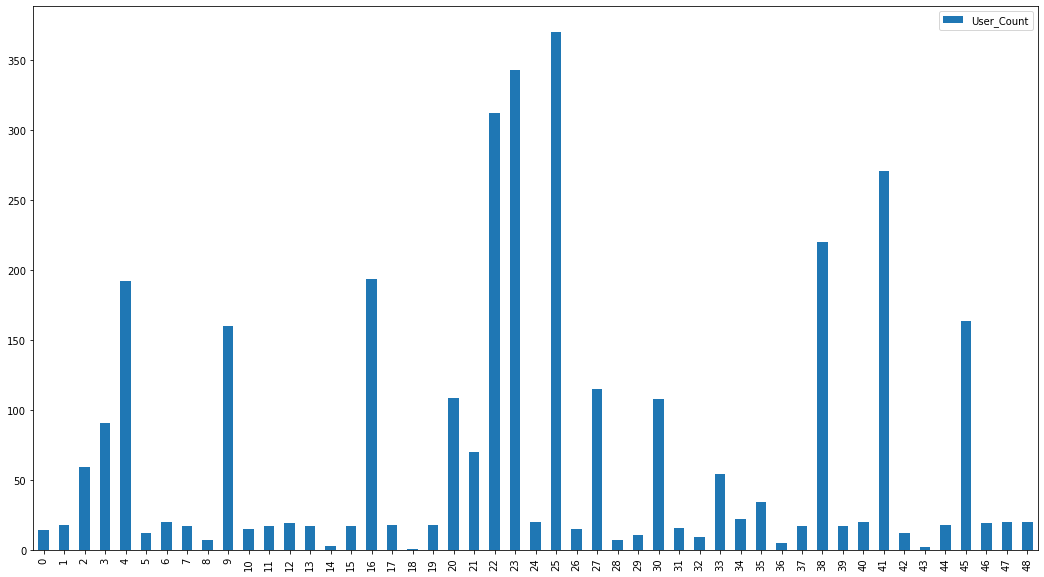

In [45]:
voice_gropued_by_locations.plot(kind="bar", figsize=(18,10),xticks=voice_gropued_by_locations.index)